In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

<Figure size 432x576 with 0 Axes>

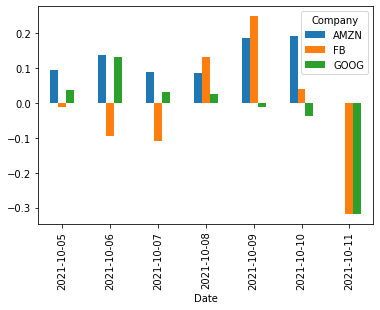

In [2]:
finviz_url = 'https://finviz.com/quote.ashx?t='
Companys = ['AMZN', 'GOOG', 'FB'] # stock companies

news_tables = {} # Declare empty dictionary to store results from finviz

for Company in Companys:
    url = finviz_url + Company
    req = Request(url=url, headers={'user-agent':'my-app'}) # Specify headers or else access will be denied
    response = urlopen(req)
    soup = BeautifulSoup(response,features='html.parser')
    news_table = soup.find(id='news-table')
    # We get table rows
    # We get text on on td tag
    # We get time stamp on tr tag
    news_tables.update({Company:news_table}) # Key ticker (Company name) and value news_table
    

parsed_data = [] # Instantiate new list object

for Company, news_table in news_tables.items(): # This will iterate over all keys and values using the .tems() function
    for row in news_table.find_all('tr'):
        Comments = row.a.text
        date_data = row.td.text.split(' ') # Split date with space 
        # If loop to determine if date is made of 1 or 2 indexes
        if len(date_data)==1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
        parsed_data.append([Company,date,time,Comments])

    

# print(parsed_data) remember the parsed data is a list of lists

df = pd.DataFrame(parsed_data, columns=['Company','Date','Time','Comments'])
# Analyse your text
vader = SentimentIntensityAnalyzer()
# When we run polarity, we get a couple of key values from the result dictionary
# 'neg', 'neu', 'pos', 'compound'
# We can pull out what ever we want to analyse from this dictionary
# Create a function and get just the compound score
# Then use the apply function to run this function
function = lambda x: vader.polarity_scores(x)['compound']
# We want to loop through our comments column
df['Compound'] = df['Comments'].apply(function)
# Convert date column to date time
df['Date'] = pd.to_datetime(df.Date).dt.date


plt.figure(figsize=(6,8))
# Using groupby makes us to have one date entry
mean_df = df.groupby(['Company','Date']).mean()
# Allow us to have date as x-axis
mean_df = mean_df.unstack()
# Remove compound column
mean_df = mean_df.xs('Compound', axis='columns').transpose()
mean_df.plot(kind='bar')
plt.show()
# print(mean_df)

In [3]:

# Getting subset
results = df.loc[(df['Company'] =='FB') & (df['Compound'] > 0) ,['Compound','Comments']]
print(results)

     Compound                                           Comments
201    0.3612  Which Social-Media Networks Do Teens Like the ...
207    0.6369   These Are The 5 Best Stocks To Buy And Watch Now
212    0.4404            Why Facebook Is a Better Buy Than Apple
213    0.4019  UPDATE 1-Philippine Nobel winner Ressa calls F...
214    0.4019  Philippine Nobel winner Ressa calls Facebook "...
216    0.3612  Teens Like Snapchat and TikTok. Facebook? Exce...
217    0.3612  Facebook apologizes for second outage in a wee...
220    0.2023  Stock Market Rally Attempt Faces Resistance; O...
224    0.3612  UPDATE 3-Facebook apologizes for second outage...
225    0.3612  Facebook apologizes for second outage in a wee...
229    0.0516  INVESTIGATION REMINDER: The Schall Law Firm An...
230    0.6874  FB INVESTOR ALERT: ROSEN, A TOP RANKED LAW FIR...
232    0.3818  UPDATE 1-Lawmakers: FTC must ensure tech compa...
233    0.3818  Lawmakers: FTC must ensure tech companies upho...
234    0.8910  Maria Ress

In [4]:
# Using query method

df = df[['Compound','Comments','Company']].query("Company==['FB','GOOG']")
df.to_csv('data/example.csv')
print(df)

     Compound                                           Comments Company
100   -0.3182  UPDATE 2-Facebook-backed group launches misinf...    GOOG
101   -0.1531  Dow Jones Futures: Market Rally Is At Inflecti...    GOOG
102    0.6369  These Are The Best Robinhood Stocks To Buy Or ...    GOOG
103   -0.3182  Facebook-backed group launches misinformation ...    GOOG
104   -0.3182  Facebook-backed group launches misinformation ...    GOOG
..        ...                                                ...     ...
295    0.0000  Senator Warren on Powell as Fed Chair, Stablec...      FB
296    0.0000  Facebook Outage Is Felt Acutely by Small-Busin...      FB
297    0.2960  Facebooks 6-hour outage highlights how vital t...      FB
298   -0.4215  Facebook Hearing Elevates Washington's Distrus...      FB
299   -0.0258  Dow Jones Gains As Apple Pops; Schumer Makes T...      FB

[200 rows x 3 columns]


In [5]:
# Map
# Map does not work on an entire dataframe but on a series e.g a column
data = pd.DataFrame({"power_level": [12000, 16000, 4000, 1500, 3000, 
                                     2000, 1600, 2000],
                     "uniform color": ["orange", "blue", "black", "orange",
                                       "purple", "green", "orange", "orange"],
                     "species": ["saiyan","saiyan","saiyan","half saiyan",
                                 "namak","human","human","human"]}, 
                     index = ["Goku","Vegeta", "Nappa","Gohan",
                                   "Piccolo","Tien","Yamcha", "Krillin"])

# Use .map() to apply a function to a pandas Series
# Data Frame columns are Series

def my_function(x):
    if x > 10000:
        return("high")
    if x > 2000:
        return("med")
    return ("low")


data["power_level"].map(my_function)

Goku       high
Vegeta     high
Nappa       med
Gohan       low
Piccolo     med
Tien        low
Yamcha      low
Krillin     low
Name: power_level, dtype: object

In [6]:
# To map Series values based on key: value correspondence
# Pass a mapping dictionary to .map() 
correspondence = {"saiyan": "alien", 
                  "namak":"alien", 
                  "human":"earthling", 
                  "half saiyan": "earthling"}

data["species"].map(correspondence)

Goku           alien
Vegeta         alien
Nappa          alien
Gohan      earthling
Piccolo        alien
Tien       earthling
Yamcha     earthling
Krillin    earthling
Name: species, dtype: object